# **Graph**

In [1]:
!pip install qiskit
!pip install pylatexenc

# Classically

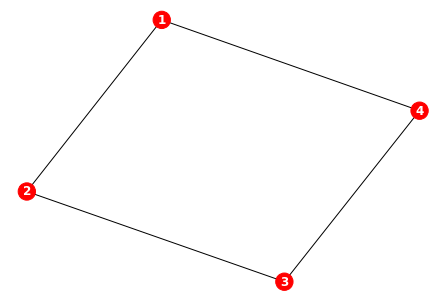

In [2]:
import matplotlib.pyplot as plt
import networkx as nx

## create graph

nodes = [1,2,3,4]
edges = {'1': [2,4], '2':[1,3], '3':[2,4],'4':[1,3]}
colors = ['r']*len(nodes)

#######

e = []
for i in edges:
  for j in edges[i]:
    if int(i)<j:
      e.append((int(i) ,j))

G=nx.Graph() 
G.add_nodes_from(nodes)
G.add_edges_from(e)

nx.draw(G, with_labels=True,node_color=colors, font_weight='bold',font_color='white')
plt.show(); 

In [5]:
import math
  
def powerset(fullset):
  listrep = list(fullset)
  subsets = []
  for i in range(2**len(listrep)):
    subset = []
    for k in range(len(listrep)):            
      if i & 1<<k:
        subset.append(listrep[k])
    subsets.append(subset)        
  return subsets

a = list(powerset(nodes))[1:-1]
b = list(reversed(list(powerset(nodes))[1:-1]))
all_p = list(zip(a,b))

In [6]:
best_value = 0
best_cut = 0

for p in all_p: 
  value1 = 0
  checklist1 = []
  for i in p[0]:
    for j in edges[str(i)]:
      if j in p[0]:
        checklist1.append(j)
    if i in checklist1:
      continue
    value1 += 1

  value2 = 0
  checklist2 = []
  for i in p[1]: 
    for j in edges[str(i)]:
      if j in p[1]:
        checklist2.append(j)
    if i in checklist2:
      continue
    value2 += 1
  
  if sum([value1, value2])> best_value:
    best_value = sum([value1, value2])
    best_cut = p
  print('Cut : ',p, '  -  Value : ',sum([value1, value2]))
print('Cut : ',best_cut, '  -  Value : ', best_value)

Cut :  ([1], [2, 3, 4])   -  Value :  2
Cut :  ([2], [1, 3, 4])   -  Value :  3
Cut :  ([1, 2], [3, 4])   -  Value :  2
Cut :  ([3], [1, 2, 4])   -  Value :  2
Cut :  ([1, 3], [2, 4])   -  Value :  4
Cut :  ([2, 3], [1, 4])   -  Value :  2
Cut :  ([1, 2, 3], [4])   -  Value :  2
Cut :  ([4], [1, 2, 3])   -  Value :  2
Cut :  ([1, 4], [2, 3])   -  Value :  2
Cut :  ([2, 4], [1, 3])   -  Value :  4
Cut :  ([1, 2, 4], [3])   -  Value :  2
Cut :  ([3, 4], [1, 2])   -  Value :  2
Cut :  ([1, 3, 4], [2])   -  Value :  3
Cut :  ([2, 3, 4], [1])   -  Value :  2
Cut :  ([1, 3], [2, 4])   -  Value :  4


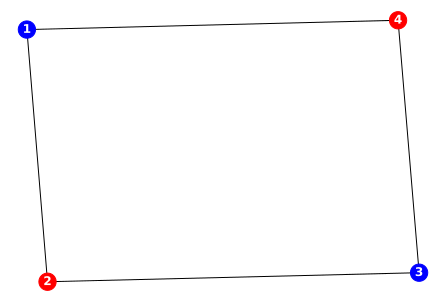

In [7]:
color = colors.copy()
for c in best_cut[0]:
  color[c-1] = 'b'

G=nx.Graph() 
G.add_nodes_from(nodes)
G.add_edges_from(e)

nx.draw(G, with_labels=True,node_color=color, font_weight='bold',font_color='white')
plt.show(); 

# Quantumly

In [8]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'svg' # Makes the images look nice

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.circuit.library import AND
# import basic plot tools
from qiskit.visualization import  plot_histogram

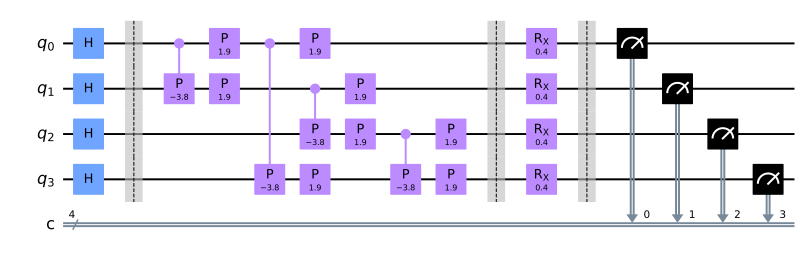

In [9]:
n = 4
V = np.arange(0,n,1)
# Evaluate the function
step_size   = 0.1;

a_gamma         = np.arange(0, np.pi, step_size)
a_beta          = np.arange(0, np.pi, step_size)
a_gamma, a_beta = np.meshgrid(a_gamma,a_beta)

F1 = 3-(np.sin(2*a_beta)**2*np.sin(2*a_gamma)**2-0.5*np.sin(4*a_beta)*np.sin(4*a_gamma))*(1+np.cos(4*a_gamma)**2)

# Grid search for the minimizing variables
result = np.where(F1 == np.amax(F1))
a      = list(zip(result[0],result[1]))[0]

gamma  = a[0]*step_size;
beta   = a[1]*step_size;

# prepare the quantum and classical resisters
QAOA = QuantumCircuit(len(V), len(V))

# apply the layer of Hadamard gates to all qubits
QAOA.h(range(len(V)))
QAOA.barrier()

# apply the Ising type gates with angle gamma along the edges in E
for edge in e:
    k = edge[0] -1
    l = edge[1] -1
    QAOA.cp(-2*gamma, k, l)
    QAOA.p(gamma, k)
    QAOA.p(gamma, l)
    
# then apply the single qubit X rotations with angle beta to all qubits
QAOA.barrier()
QAOA.rx(2*beta, range(len(V)))

# Finally measure the result in the computational basis
QAOA.barrier()
QAOA.measure(range(len(V)),range(len(V)))

### draw the circuit for comparison
QAOA.draw(output="mpl")


{'0000': 421, '0001': 312, '0010': 301, '0011': 921, '0100': 296, '0101': 1542, '0110': 859, '0111': 282, '1000': 318, '1001': 942, '1010': 1481, '1011': 338, '1100': 946, '1101': 324, '1110': 279, '1111': 438}


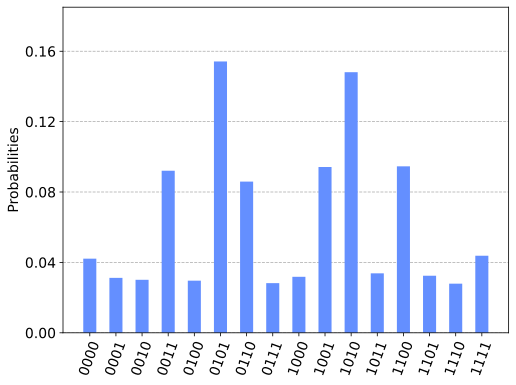

In [10]:
# run on local simulator
backend      = Aer.get_backend("qasm_simulator")
shots        = 10000

simulate     = execute(QAOA, backend=backend, shots=shots)
answer = simulate.result().get_counts()
print(answer)
plot_histogram(answer,figsize = (8,6),bar_labels = False)

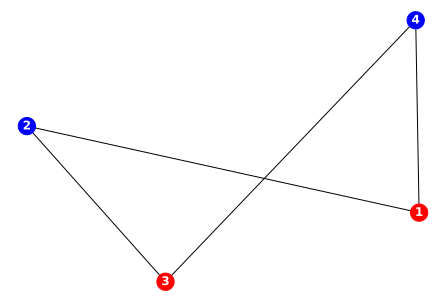

In [11]:
best_p = 0
a = '000'
for c in answer:
  
  if best_p < answer[c]:
    best_p = answer[c]
    a = c
color = colors.copy()
for id, c in enumerate(a):
  #c = c[::-1]
  if c == '1':
    color[id] = 'r'
  else:
    color[id] = 'b'
color = list(reversed(color))
G=nx.Graph() 
G.add_nodes_from(nodes)
G.add_edges_from(e)

nx.draw(G, with_labels=True,node_color=color, font_weight='bold',font_color='white')
plt.show(); 